# Advanced scikit-learn

## Agenda

- StandardScaler
- Pipeline (bonus content)

## StandardScaler

### Let's look at an example of the problem we're trying to solve?

In [3]:
# create fake data for an examole
import pandas as pd
train = pd.DataFrame({'id':[0,1,2], 'length':[0.9,0.3,0.6], 'mass':[0.1,0.2,0.8], 'rings':[40,50,60]})
test = pd.DataFrame({'length':[0.59], 'mass':[0.79], 'rings':[54]})

In [4]:
# training data
train


,id,length,mass,rings
0,0,0.9,0.1,40
1,1,0.3,0.2,50
2,2,0.6,0.8,60


In [5]:
# testing data
test

,length,mass,rings
0,0.59,0.79,54


In [6]:
# define X and y
feature_cols = ['length', 'mass', 'rings']
X = train[feature_cols]
y = train.id

In [7]:
# KNN with K=1
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X, y)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=1, n_neighbors=1, p=2,
           weights='uniform')

In [8]:
# what will this predict?
knn.predict(test)

array([1])

In [9]:
# allow plots to appear in the notebook
%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['font.size'] = 14
plt.rcParams['figure.figsize'] = (5, 5)

In [10]:
# create a "colors" array for plotting
import numpy as np
colors = np.array(['red','green','blue'])

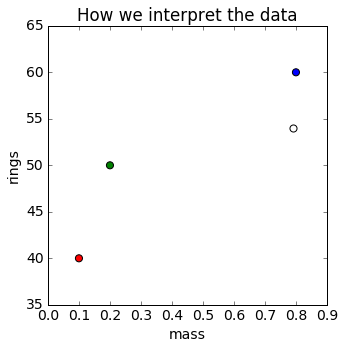

In [11]:
# scatter plot of training data, colored by id (0=red, 1=green, 2=blue)
plt.scatter(train.mass, train.rings, c=colors[train.id], s=50)

# testing data
plt.scatter(test.mass, test.rings, c='white', s=50)

# add labels
plt.xlabel('mass')
plt.ylabel('rings')
plt.title('How we interpret the data')

(0, 30)

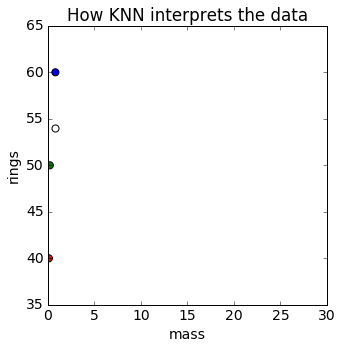

In [12]:
# adjust the x-limits
plt.scatter(train.mass, train.rings, c=colors[train.id], s=50)
plt.scatter(test.mass, test.rings, c='white', s=50)
plt.xlabel('mass')
plt.ylabel('rings')
plt.title('How KNN interprets the data')
plt.xlim(0, 30)

### How does StandardScaler solve the problem?

[StandardScaler](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) is used for the "standardization" of features, also known as "center and scale" or **"z-score normalization"**.

In [13]:
# standardize the features
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

In [14]:
# original values
X.values

array([[  0.9,   0.1,  40. ],
       [  0.3,   0.2,  50. ],
       [  0.6,   0.8,  60. ]])

In [15]:
# standardized values
X_scaled

array([[ 1.22474487, -0.86266219, -1.22474487],
       [-1.22474487, -0.53916387,  0.        ],
       [ 0.        ,  1.40182605,  1.22474487]])

In [19]:
# figure out how it standardized
(X.values - scaler.mean_)/scaler.std_

/Users/jim_byers/anaconda/lib/python2.7/site-packages/sklearn/utils/__init__.py:93: DeprecationWarning: Function std_ is deprecated; Attribute ``std_`` will be removed in 0.19. Use ``scale_`` instead
  warnings.warn(msg, category=DeprecationWarning)


array([[ 1.22474487, -0.86266219, -1.22474487],
       [-1.22474487, -0.53916387,  0.        ],
       [ 0.        ,  1.40182605,  1.22474487]])

In [ ]:
# manually standardize
(X.values - scaler.mean_) / scaler.std_

### Applying StandardScaler to a real dataset

- Wine dataset from the UCI Machine Learning Repository: [data](http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data), [data dictionary](http://archive.ics.uci.edu/ml/datasets/Wine)
- **Goal:** Predict the origin of wine using chemical analysis

In [20]:
# read three columns from the dataset into a DataFrame
url = 'http://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
col_names = ['label', 'color', 'proline']
wine = pd.read_csv(url, header=None, names=col_names, usecols=[0, 10, 13])

In [22]:
wine.head()

,label,color,proline
0,1,5.64,1065
1,1,4.38,1050
2,1,5.68,1185
3,1,7.80,1480
4,1,4.32,735


In [23]:
wine.describe()

,label,color,proline
count,178.000000,178.000000,178.000000
mean,1.938202,5.058090,746.893258
std,0.775035,2.318286,314.907474
min,1.000000,1.280000,278.000000
25%,1.000000,3.220000,500.500000
50%,2.000000,4.690000,673.500000
75%,3.000000,6.200000,985.000000
max,3.000000,13.000000,1680.000000


In [24]:
# define X and y
feature_cols = ['color', 'proline']
X = wine[feature_cols]
y = wine.label

In [25]:
# split into training and testing sets
from sklearn.cross_validation import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

In [26]:
# standardize X_train
scaler.fit(X_train)
X_train_scaled = scaler.transform(X_train)

In [27]:
# check that it standardized properly
print X_train_scaled[:, 0].mean()
print X_train_scaled[:, 0].std()
print X_train_scaled[:, 1].mean()
print X_train_scaled[:, 1].std()

-3.90664944003e-16
1.0
1.6027279754e-16
1.0


In [28]:
# standardize X_test
X_test_scaled = scaler.transform(X_test)

In [29]:
# is this right?
print X_test_scaled[:, 0].mean()
print X_test_scaled[:, 0].std()
print X_test_scaled[:, 1].mean()
print X_test_scaled[:, 1].std()

0.0305898576303
0.866822198488
0.0546533341088
1.14955947533


In [30]:
# KNN accuracy on original data
knn = KNeighborsClassifier(n_neighbors=3)
knn.fit(X_train, y_train)
y_pred_class = knn.predict(X_test)
from sklearn import metrics
print metrics.accuracy_score(y_test, y_pred_class)

0.644444444444


In [31]:
# KNN accuracy on scaled data
knn.fit(X_train_scaled, y_train)
y_pred_class = knn.predict(X_test_scaled)
print metrics.accuracy_score(y_test, y_pred_class)

0.866666666667


## Pipeline (bonus content)

### What is the problem we're trying to solve?

In [ ]:
# define X and y
feature_cols = ['color', 'proline']
X = wine[feature_cols]
y = wine.label

In [ ]:
# proper cross-validation on the original (unscaled) data
knn = KNeighborsClassifier(n_neighbors=3)
from sklearn.cross_validation import cross_val_score
cross_val_score(knn, X, y, cv=5, scoring='accuracy').mean()

In [ ]:
# why is this improper cross-validation on the scaled data?
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)
cross_val_score(knn, X_scaled, y, cv=5, scoring='accuracy').mean()

### How does Pipeline solve the problem?

[Pipeline](http://scikit-learn.org/stable/modules/pipeline.html) is used for chaining steps together:

In [ ]:
# fix the cross-validation process using Pipeline
from sklearn.pipeline import make_pipeline
pipe = make_pipeline(StandardScaler(), KNeighborsClassifier(n_neighbors=3))
cross_val_score(pipe, X, y, cv=5, scoring='accuracy').mean()

Pipeline can also be used with [GridSearchCV](http://scikit-learn.org/stable/modules/generated/sklearn.grid_search.GridSearchCV.html) for parameter searching:

In [ ]:
# search for an optimal n_neighbors value using GridSearchCV
neighbors_range = range(1, 21)
param_grid = dict(kneighborsclassifier__n_neighbors=neighbors_range)
from sklearn.grid_search import GridSearchCV
grid = GridSearchCV(pipe, param_grid, cv=5, scoring='accuracy')
grid.fit(X, y)
print grid.best_score_
print grid.best_params_